In [1]:
import numpy as np;
import os;
import pathlib;
import torchvision;
from torch import nn;
import torch;

In [2]:
for dirpath,dirname,filename in os.walk("./Fast Food Data/"):
    print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

There are 2 directories and 0 images in ./Fast Food Data/
There are 5 directories and 0 images in ./Fast Food Data/Test
There are 0 directories and 500 images in ./Fast Food Data/Test\Burger
There are 0 directories and 500 images in ./Fast Food Data/Test\Donut
There are 0 directories and 500 images in ./Fast Food Data/Test\Hot Dog
There are 0 directories and 500 images in ./Fast Food Data/Test\Pizza
There are 0 directories and 500 images in ./Fast Food Data/Test\Sandwich
There are 5 directories and 0 images in ./Fast Food Data/Train
There are 0 directories and 1500 images in ./Fast Food Data/Train\Burger
There are 0 directories and 1500 images in ./Fast Food Data/Train\Donut
There are 0 directories and 1500 images in ./Fast Food Data/Train\Hot Dog
There are 0 directories and 1500 images in ./Fast Food Data/Train\Pizza
There are 0 directories and 1500 images in ./Fast Food Data/Train\Sandwich


In [3]:
image_path=pathlib.Path("./Fast Food Data/")
train_dir=image_path/"Train"
test_dir=image_path/"Test"

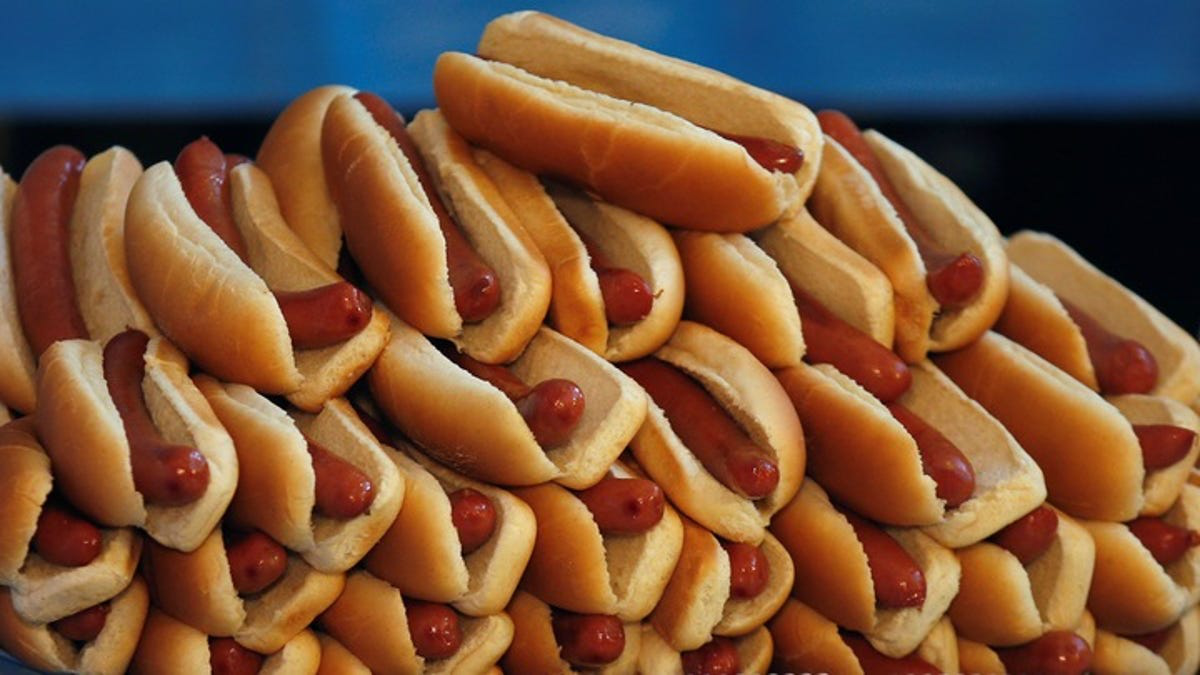

In [5]:
import random
from PIL import Image

image_path_list=list(image_path.glob("*/*/*.jpg"))
random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem
image=Image.open(random_image_path)
image

In [11]:
random_image_path.parent

WindowsPath('Fast Food Data/Train/Hot Dog')

In [12]:
random_image_path.parent.stem

'Hot Dog'

In [13]:
image.size

(1200, 675)

Text(0.5, 1.0, 'Hot Dog')

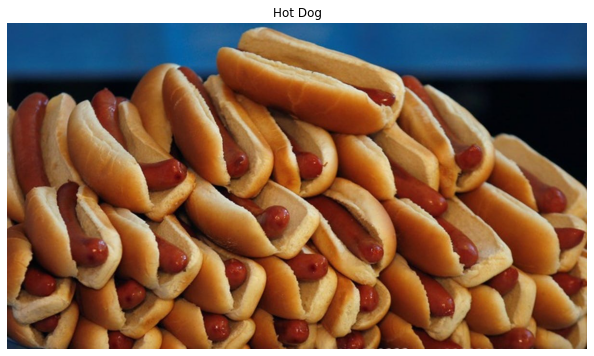

In [14]:
import matplotlib.pyplot as plt

img_as_array=np.asarray(image)
plt.figure(figsize=(12,6))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(image_class)

In [15]:
from torch.utils.data import DataLoader;
from torchvision import datasets,transforms;

data_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [27]:
def plot_transformed_images(image_paths,transform,n:int =3,seed:int =42):
    random.seed(seed)
    random_image_path=random.sample(image_paths,k=3)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original:\n Size:{f.size}")
            ax[0].axis(False)
            transformed_image=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Image:\nSIze:{transformed_image.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class = {image_path.parent.stem}",fontsize=16)

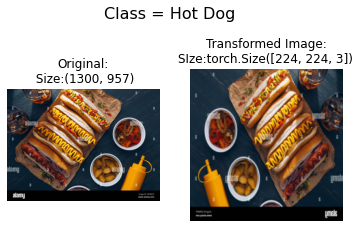

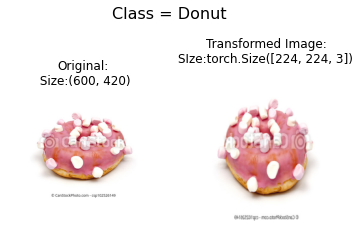

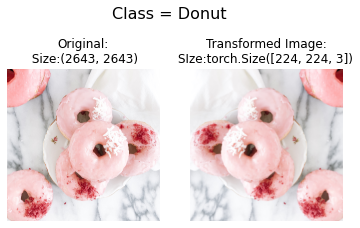

In [28]:
plot_transformed_images(image_paths=image_path_list,transform=data_transforms,n=3)

In [29]:
from torchvision import datasets
train_data=datasets.ImageFolder(
    root=train_dir,transform=data_transforms,target_transform=None
)
test_data=datasets.ImageFolder(
    root=test_dir,transform=data_transforms
)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 7500
     Root location: Fast Food Data\Train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2500
     Root location: Fast Food Data\Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [30]:
class_names=train_data.classes
class_names

['Burger', 'Donut', 'Hot Dog', 'Pizza', 'Sandwich']

In [32]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'Burger': 0, 'Donut': 1, 'Hot Dog': 2, 'Pizza': 3, 'Sandwich': 4}

In [33]:
img,label=train_data[0][0],train_data[0][1]
img,label

(tensor([[[0.1373, 0.1373, 0.1333,  ..., 0.1608, 0.1529, 0.1490],
          [0.1373, 0.1373, 0.1333,  ..., 0.1608, 0.1529, 0.1490],
          [0.1412, 0.1412, 0.1373,  ..., 0.1569, 0.1490, 0.1451],
          ...,
          [0.1725, 0.1686, 0.1569,  ..., 0.1098, 0.0980, 0.0980],
          [0.2000, 0.1961, 0.1804,  ..., 0.1020, 0.0941, 0.0941],
          [0.2118, 0.2078, 0.1922,  ..., 0.0980, 0.0941, 0.0941]],
 
         [[0.0235, 0.0235, 0.0196,  ..., 0.1020, 0.0941, 0.0902],
          [0.0235, 0.0235, 0.0196,  ..., 0.1020, 0.0941, 0.0902],
          [0.0275, 0.0275, 0.0235,  ..., 0.0980, 0.0902, 0.0863],
          ...,
          [0.1059, 0.1020, 0.0902,  ..., 0.0667, 0.0549, 0.0549],
          [0.1333, 0.1294, 0.1137,  ..., 0.0588, 0.0510, 0.0510],
          [0.1451, 0.1412, 0.1255,  ..., 0.0549, 0.0510, 0.0510]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0902, 0.0824, 0.0784],
          [0.0000, 0.0000, 0.0000,  ..., 0.0902, 0.0824, 0.0784],
          [0.0039, 0.0039, 0.0000,  ...,

In [37]:
img.shape

torch.Size([3, 224, 224])

Text(0.5, 1.0, 'Burger')

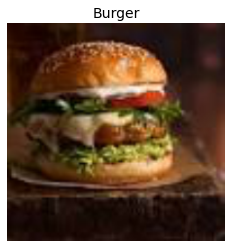

In [34]:
plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label],fontsize=14)

In [35]:
from torch.utils.data import DataLoader;

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

In [38]:
img,label=next(iter(train_dataloader))

In [39]:
img.shape 

torch.Size([32, 3, 224, 224])

In [58]:
train_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.RandomRotation(0.2),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [59]:
from typing import Tuple,List,Dict

In [60]:
def display_random_image(
    dataset:torch.utils.data.Dataset,
    classes:List[str]=None,
    n:int=10,
    display_shape:bool=True,
    seed:int = None
):
    if n>10:
        n=10
        display_shape=False
        
    if seed:
        random.seed(seed)
    random_samples_idx=random.sample(range(len(dataset)),k=n)
    plt.figure(figsize=(16,10))
    
    for i,targ_sample in enumerate(random_samples_idx):
        targ_image,targ_label=dataset[targ_sample][0],dataset[targ_sample][1]
        targ_image_adjust=targ_image.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        
        if classes:
            title=f"Class:{classes[targ_label]}"
        if display_shape:
            title=title+f"\nShape:{targ_image_adjust.numpy().shape}"
        plt.title(title)    

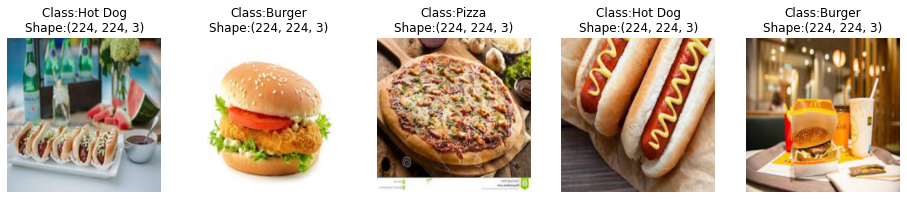

In [63]:
display_random_image(train_data,n=5,classes=class_names,seed=None)

In [64]:
class TinyVGG(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int) ->None:
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,padding=1,stride=1,kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,out_features=output_shape)
        )
        
    def forward(self,x:torch.Tensor):
        x=self.conv_block_1(x)
        x=self.conv_block_2(x)
        x=self.classifier(x)
        return x

In [65]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes)).to(device="cuda")
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=5, bias=True)
  )
)

In [69]:
from torchinfo import summary

summary(model_0,input_shape=[32,3,224,224])

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      156,805
Total params: 159,815
Trainable params: 159,815
Non-trainable params: 0

In [73]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer=torch.optim.Optimizer,
               device:torch.device="cuda"):
    
    model.train()
    
    train_loss,train_acc = 0,0
    
    for batch,(X,Y) in enumerate(data_loader):
        X,Y=X.to(device),Y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,Y)
        train_loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=((y_pred_class==Y).sum().item())/len(y_pred)
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    
    return train_loss,train_acc

In [78]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device:torch.device="cuda"):
    model.eval()
    test_loss,test_acc=0,0
    
    with torch.inference_mode():
        for batch,(X,Y) in enumerate(data_loader):
            X,Y=X.to(device),Y.to(device)
            test_pred_logits=model(X)
            loss=loss_fn(test_pred_logits,Y)
            test_loss+=loss.item()# note we need not use softmax for validation cuz we got test logits
            test_pred_labels=test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels==Y).sum().item())/len(test_pred_labels)
    test_loss /=len(data_loader)
    test_acc /= len(data_loader)
    
    return test_loss,test_acc

In [79]:
from tqdm.auto import tqdm;

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int = 5):
    results={
        "train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model=model,
                                        data_loader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device="cuda")
        test_loss,test_acc=test_step(model=model,
                                     data_loader=test_dataloader,
                                     loss_fn=loss_fn,
                                     device="cuda")
        
        print(f"Epoch:{epoch+1} | Train Loss:{train_loss:.3f} | Train Accuracy:{train_acc:.3f} | Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.3f}\n")
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [81]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=10

model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes)).to(device="cuda")
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_0.parameters(),lr=0.001)

from timeit import default_timer as timer;

start_time=timer()

model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)
end_time=timer()

print(f"Total Running Time:{end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:1 | Train Loss:1.579 | Train Accuracy:0.265 | Test Loss: 1.483 | Test Accuracy: 0.373

Epoch:2 | Train Loss:1.432 | Train Accuracy:0.381 | Test Loss: 1.419 | Test Accuracy: 0.404

Epoch:3 | Train Loss:1.363 | Train Accuracy:0.424 | Test Loss: 1.312 | Test Accuracy: 0.461

Epoch:4 | Train Loss:1.297 | Train Accuracy:0.468 | Test Loss: 1.293 | Test Accuracy: 0.472

Epoch:5 | Train Loss:1.219 | Train Accuracy:0.507 | Test Loss: 1.219 | Test Accuracy: 0.506

Epoch:6 | Train Loss:1.159 | Train Accuracy:0.540 | Test Loss: 1.223 | Test Accuracy: 0.513

Epoch:7 | Train Loss:1.077 | Train Accuracy:0.580 | Test Loss: 1.213 | Test Accuracy: 0.525

Epoch:8 | Train Loss:0.982 | Train Accuracy:0.627 | Test Loss: 1.252 | Test Accuracy: 0.543

Epoch:9 | Train Loss:0.870 | Train Accuracy:0.675 | Test Loss: 1.321 | Test Accuracy: 0.514

Epoch:10 | Train Loss:0.782 | Train Accuracy:0.716 | Test Loss: 1.331 | Test Accuracy: 0.543

Total Running Time:940.187 seconds


In [84]:
import pandas as pd;
model_0_results=pd.DataFrame(model_0_results)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000026A6BB02200>
Traceback (most recent call last):
  File "c:\Anaconda\envs\torch_env\lib\site-packages\torch\utils\data\dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "c:\Anaconda\envs\torch_env\lib\site-packages\torch\utils\data\dataloader.py", line 1424, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


In [85]:
model_0_results

,train_loss,train_acc,test_loss,test_acc
0,1.579073,0.265071,1.483051,0.373022
1,1.431574,0.380984,1.419023,0.403877
2,1.363347,0.424424,1.311620,0.461234
3,1.296970,0.468262,1.293354,0.472310
4,1.218574,0.506915,1.218875,0.506329
5,1.158537,0.539982,1.223195,0.512658
6,1.077310,0.579832,1.213325,0.525316
7,0.981740,0.626950,1.252378,0.543117
8,0.869991,0.674734,1.320758,0.514241
9,0.781697,0.715603,1.331315,0.543117


In [160]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device:torch.device="cuda"
                        ):
    target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image/=255.
    if transform:
        target_image=transform(target_image)
    model.to(device)
    
    model.eval()
    
    with torch.inference_mode():
        target_image=target_image.unsqueeze(dim=0)
        target_image_pred=model(target_image.to(device))
        target_image_pred_probs=torch.softmax(target_image_pred,dim=1)
        target_image_pred_label=torch.argmax(target_image_pred_probs,dim=1)
        plt.imshow(target_image.squeeze(dim=0).permute(1,2,0))
        if class_names:
            title=f"Pred:{class_names[target_image_pred_label.cpu()]} | Prob:{target_image_pred_probs.max().cpu():.3f}"
        else:
            title=f"Pred:{target_image_pred_label.cpu()} | Prob:{target_image_pred_probs.max().cpu():.3f}"
        plt.title(title)
        plt.axis(False)

In [133]:
custom_image_transfrom=transforms.Compose([
    transforms.Resize((224,224))
])

In [134]:
manual_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.436,0.406],std=[[0.229,0.224,0.225]])
])

In [135]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms=weights.transforms()

In [136]:
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [99]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_1=torchvision.models.efficientnet_b0(weights=weights).to(device="cuda")
summary(model=model_1,input_size=[32,3,224,224],col_names=["input_size","output_size","num_params","trainable"],col_width=20,
        row_settings=["var_names"])

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to C:\Users\rajashekar V.T/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [100]:
for param in model_1.features.parameters():
    param.requires_grad=False

In [103]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape=len(class_names)

model_1.classifier=torch.nn.Sequential(
    torch.nn.Dropout(p=0.2,inplace=True),
    torch.nn.Linear(in_features=1280,out_features=output_shape,bias=True)
).to(device="cuda")
summary(model=model_1,input_size=[32,3,224,224],col_names=["input_size","output_size","num_params","trainable"],col_width=20,row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 5]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [105]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_1.parameters(),lr=0.001)

start_time=timer()

model_1_results=train(model=model_1,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS,
                      )

end_time=timer()

print(f"[INFO] Total Training Time:{end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:1 | Train Loss:0.687 | Train Accuracy:0.789 | Test Loss: 0.502 | Test Accuracy: 0.844

Epoch:2 | Train Loss:0.433 | Train Accuracy:0.859 | Test Loss: 0.445 | Test Accuracy: 0.854

Epoch:3 | Train Loss:0.387 | Train Accuracy:0.871 | Test Loss: 0.410 | Test Accuracy: 0.865

Epoch:4 | Train Loss:0.365 | Train Accuracy:0.879 | Test Loss: 0.404 | Test Accuracy: 0.866

Epoch:5 | Train Loss:0.349 | Train Accuracy:0.887 | Test Loss: 0.424 | Test Accuracy: 0.854

Epoch:6 | Train Loss:0.327 | Train Accuracy:0.896 | Test Loss: 0.408 | Test Accuracy: 0.860

Epoch:7 | Train Loss:0.331 | Train Accuracy:0.888 | Test Loss: 0.398 | Test Accuracy: 0.862

Epoch:8 | Train Loss:0.321 | Train Accuracy:0.897 | Test Loss: 0.397 | Test Accuracy: 0.868

Epoch:9 | Train Loss:0.316 | Train Accuracy:0.893 | Test Loss: 0.410 | Test Accuracy: 0.860

Epoch:10 | Train Loss:0.318 | Train Accuracy:0.891 | Test Loss: 0.405 | Test Accuracy: 0.860

[INFO] Total Training Time:924.002 seconds


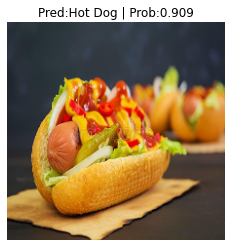

In [141]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/image4.png",class_names=class_names,transform=custom_image_transfrom)

In [142]:
image_path_list=os.listdir("./Internet Downloaded Images/")

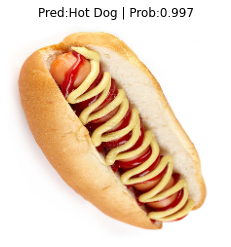

In [148]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/image6.png",class_names=class_names,transform=custom_image_transfrom)

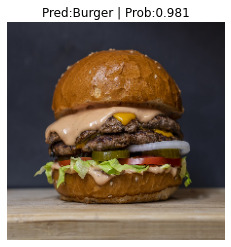

In [157]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/image7.png",class_names=class_names,transform=custom_image_transfrom)

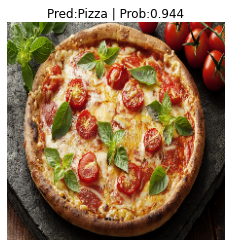

In [161]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/image9.png",class_names=class_names,transform=custom_image_transfrom)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


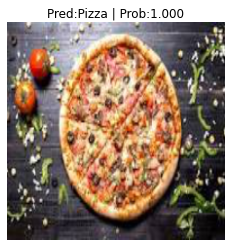

In [163]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/image9.png",class_names=class_names,transform=custom_image_transfrom)
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/images (1).png",class_names=class_names,transform=custom_image_transfrom)
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/images (2).png",class_names=class_names,transform=custom_image_transfrom)

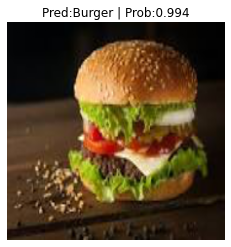

In [164]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/images (1).png",class_names=class_names,transform=custom_image_transfrom)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


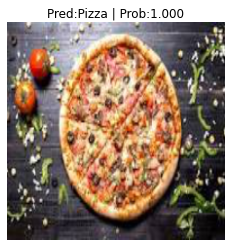

In [165]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/images (2).png",class_names=class_names,transform=custom_image_transfrom)

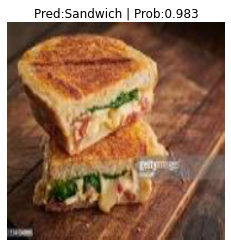

In [166]:
pred_and_plot_image(model=model_1,image_path="./Internet Downloaded Images/images (3).png",class_names=class_names,transform=custom_image_transfrom)